# End to end dog breed prediction

### Get our workspace ready

In [15]:
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.4.1


In [14]:
# import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for availibility
print("GPU", "available (yessss)" if tf.config.list_physical_devices("GPU") else "not avilable :(")

TF version: 2.4.1
TF Hub version: 0.12.0
GPU available (yessss)


### Getting our data ready

#### we have to convert our data into numerical format 

In [13]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     f811a137cac1489f074529064f79acfe  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [26]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


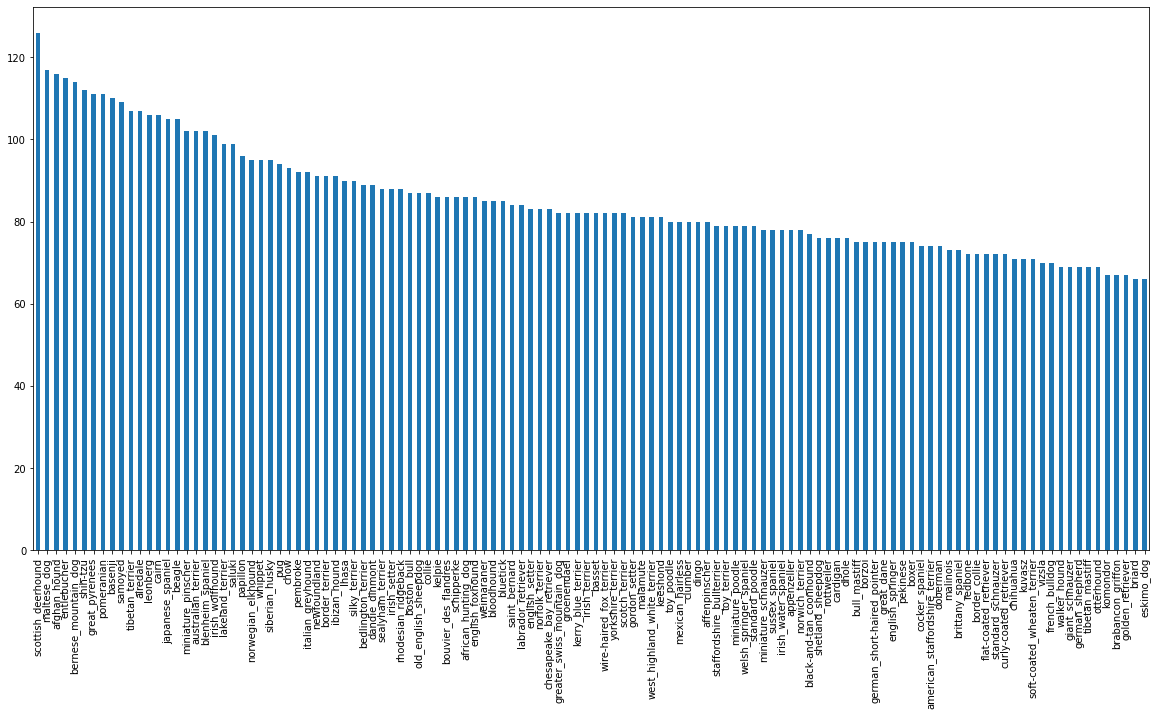

In [27]:
# How many images are there of each breed ?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

In [28]:
labels_csv["breed"].value_counts().median()

82.0

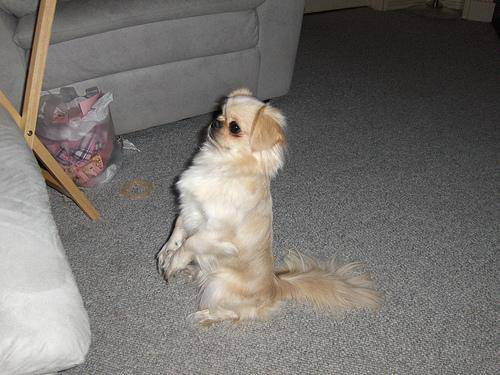

In [29]:
# let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg")

In [30]:
# Create pathname from Image ID"s
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dog Vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dog Vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/Dog Vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/Dog Vision/train/006cc3ddb9dc1bd827479569fcdc52d

In [31]:
len(filenames)

10222

In [ ]:
# Check whether number of files matches of images in filename list
import os
len(os.listdir("drive/MyDrive/Dog Vision/train/")) 

10222

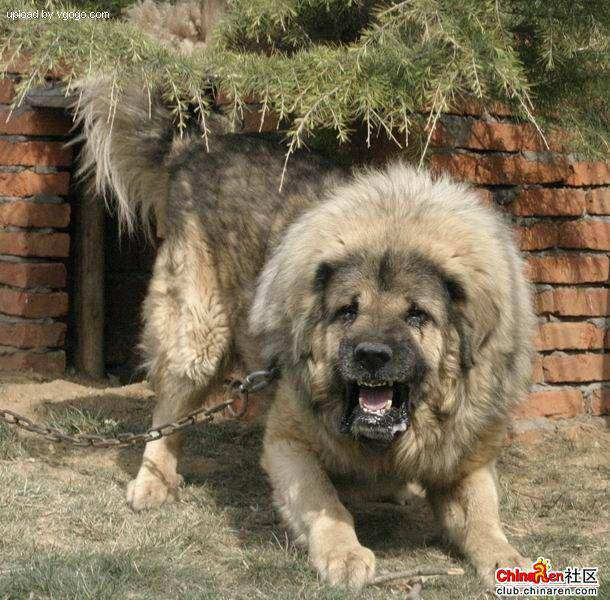

In [ ]:
Image(filenames[9000])

In [ ]:
len(os.listdir("drive/MyDrive/Dog Vision/train/"))

10222

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [16]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
len(filenames)

10222

In [17]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn a single label into array of booleans
labels[1022]

'toy_poodle'

In [ ]:
labels[10221] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [34]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

In [35]:
X = filenames
y = boolean_labels

In [ ]:
NUM_IMAGES = 1000 #@param{type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# lets split the data into train and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                   random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

In [ ]:
y_train[:2]

In [43]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

In [ ]:
image[:2]

In [ ]:
# Turn image into tensor
tf.constant(image)[:2]

In [42]:
# Turn the filepaths of images to tensors
# define image size
IMG_SIZE = 224

# Create a function for prepricessing images
def process_image(image_path):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with 3 colour channels(Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel value from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to (224, 224)
  image = tf.image.resize(image, size=(224, 224))

  return image

In [41]:
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [ ]:
get_image_label(X[42],y[42])

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  creates data batches out of image (X) and label (y) pairs.
  '''
  # If the data is a test data set ,we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                tf.constant(y))) # labels
    # Shuffling the data
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples 
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch




In [ ]:
# CREating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

### visualisizing our data batches


In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in data batch
def show_25_images(images, labels):
  '''
  Displays a plot of 25 images and their labels from a data batch
  '''
  # Set up figure
  fig = plt.figure(figsize=(10, 10))
  # Loop through 25 images
  for i in range(25):
    # Create subplot (5 rows, 5 columns)
    axes = []
    axes.append(fig.add_subplot(5, 5, i+1) )
    # display an image
    plt.imshow(images[i])
    # Add image label as title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")


In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

In [ ]:
show_25_images(train_images, train_labels)

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())

In [ ]:
show_25_images(val_images, val_labels)

In [46]:
# setup input shape to model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# setup output shape to our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [47]:
# create a function  to build keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)
  
  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                            activation="softmax") # layer 2 (output layer) 
                               ])
  
  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model
  


In [ ]:
model= create_model()
model.summary()

### Creating callbacks

## 1.Tensor board callback

In [49]:
# Load Tensorboard callback extension
%load_ext tensorboard

In [50]:
import datetime

# Create a function to build a tensorboard callback
def create_tensorboard_callback():
  #Create a log directory for storing tensorboard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback

In [51]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                   patience=3)

## Training the model on subset

In [52]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [53]:
# Build a function to train and return a trained model
def train_model():
  # Create a model
  model = create_model()

  # Create new tensorboard session every time  we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to data passing it the callbacks we created
  model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1,
             callbacks=[tensorboard, early_stopping])
  return model

In [ ]:
model = train_model()

In [ ]:
# using tesorboard magic function to visual the contents.
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

In [ ]:
val_data

In [ ]:
# make predictions on validation data (not used to train)
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
len(predictions)

In [ ]:
predictions.shape

In [ ]:
np.sum(predictions[0])

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"max value of probablity of prediction: {np.max(predictions[index])}")
print(f"sum : {np.sum(predictions[index])}")
print(f"max index: {np.argmax(predictions[index])}")
print(f"predicted label: {unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
unique_breeds[113]

### note: prediction prabilities are also known as confidence levels

In [ ]:
# Turn predicvtions prabilities into their respective label 
def get_pred_label(prediction_probabilities):
  '''
  Turns an array of predictions into labels.
  '''
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
pred_label = get_pred_label(predictions[81])
pred_label

In [ ]:
val_data

In [ ]:
# Create  a function to unbatch the dataset
def unbatchify(data):
  '''
  takes a batched dataset of (images, labels) Tensors and returns separate arrays
  of images and labels.
  '''
  images = []
  labels = []
  # loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
     

In [ ]:
# unbatchify the validation data
val_images, val_labels = unbatchify(val_data)

In [ ]:
val_images[0]

In [ ]:
val_labels

In [ ]:
get_pred_label(val_labels[0])

In [ ]:
# Create a function for ploting pred label, pred probabilities, truth label
def plot_pred(prediction_probabilities, labels, images, n=1):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  # get pred label
  pred_label = get_pred_label(pred_prob)
  

  # plot images and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change colour of title depends upon right or wrong predictions
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [ ]:
# plot the top prediction probablities values and labels, coloring the true label green
def plot_pred_conf(prediction_probabilities, labels, n=1):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # get the predicted label
  pred_label = get_pred_label(pred_prob)

  # find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_indexes)),
                     top_10_pred_values,
                     color="grey")
  
  plt.xticks(np.arange(len(top_10_pred_labels)),
             top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass  

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
                n=9)

In [ ]:
#  lets check  some predictions
i_multiplier = 20
num_images = 6
plt.figure(figsize=(20, 15))
for i in range(num_images):
  plt.subplot(3, 4, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(3, 4, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                  n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()  

In [55]:
# create a function o save a model
def save_model(model, suffix=None):

  #create a model directory path name with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"saving model to: {model_path} ...")
  model.save(model_path)
  return model_path


In [60]:
# create a function to load a trained model
def load_model(model_path):
  print(f"loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                      custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

In [ ]:
# loading a trained model
loaded_1000_image_model = load_model("drive/MyDrive/Dog Vision/models/210518-14251621347935-1000-images-mobilenetv2-Adam.h5")

In [ ]:
# evaluate presaved model
model.evaluate(val_data)

In [22]:
## Training the big dog model on full data

In [36]:
len(X)

10222

In [37]:
len(y)

10222

In [38]:
X[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [39]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  '''
  creates data batches out of image (X) and label (y) pairs.
  '''
  # If the data is a test data set ,we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                                tf.constant(y))) # labels
    # Shuffling the data
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples 
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch


In [44]:
full_data = create_data_batches(X, y)

Creating training data batches...


In [45]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [48]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [54]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [57]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 173s 542ms/step - loss: 0.4198 - accuracy: 0.8764
Epoch 2/100
320/320 [==============================] - 38s 119ms/step - loss: 0.2467 - accuracy: 0.9284
Epoch 3/100
320/320 [==============================] - 38s 120ms/step - loss: 0.1594 - accuracy: 0.9606
Epoch 4/100
320/320 [==============================] - 38s 119ms/step - loss: 0.1081 - accuracy: 0.9776
Epoch 5/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0777 - accuracy: 0.9872
Epoch 6/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0598 - accuracy: 0.9905
Epoch 7/100
320/320 [==============================] - 39s 122ms/step - loss: 0.0464 - accuracy: 0.9949
Epoch 8/100
320/320 [==============================] - 38s 120ms/step - loss: 0.0382 - accuracy: 0.9959
Epoch 9/100
320/320 [==============================] - 38s 119ms/step - loss: 0.0321 - accuracy: 0.9969
Epoch 10/100
320/320 [==============================] - 38s 119

In [58]:
save_model(full_model, suffix="ful-images-set-mobilenetv2-Adam")

saving model to: drive/MyDrive/Dog Vision/models/210519-11051621422355-ful-images-set-mobilenetv2-Adam.h5 ...


'drive/MyDrive/Dog Vision/models/210519-11051621422355-ful-images-set-mobilenetv2-Adam.h5'

In [3]:
# Load full model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/models/210519-11051621422355-ful-images-set-mobilenetv2-Adam.h5")

NameError: ignored

In [21]:
# load test images filenames
test_path = "drive/MyDrive/Dog Vision/test/"
import os
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/df47feaaf3dfb33cf712cccdddc8060e.jpg',
 'drive/MyDrive/Dog Vision/test/e46a2bfb7816324d171c4e07786abc59.jpg',
 'drive/MyDrive/Dog Vision/test/e5de4eec61d00ee4834ff0153f90ed41.jpg',
 'drive/MyDrive/Dog Vision/test/df645ae75554d4d7130bfa1b72be53ce.jpg',
 'drive/MyDrive/Dog Vision/test/e65bf4e655ccf594210174f124e3adf0.jpg',
 'drive/MyDrive/Dog Vision/test/e63da7cff68f6a5e452bb73cdbd93ad3.jpg',
 'drive/MyDrive/Dog Vision/test/e7340d1efa70bf6d6c134e1e150f9473.jpg',
 'drive/MyDrive/Dog Vision/test/e4897fe96990006c10ec7336772cbd37.jpg',
 'drive/MyDrive/Dog Vision/test/e53cb5b42ea1a7700cd294a336890361.jpg',
 'drive/MyDrive/Dog Vision/test/df9ee3c663b1f2ca84781c09fa8c31f8.jpg']

In [63]:
len(test_filenames)

10357

In [64]:
# create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [65]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [78]:
# make predictions on test data batch using the loaded full model
#test_predictions = loaded_full_model.predict(test_data,
                                              verbose=1)

IndentationError: ignored

In [79]:
# save predictions(numpy array) to csv file (for acess later)
#np.savetxt("drive/Mydrive/Dog Vision/pred file/dog-vision-prediction-array.csv",test_predictions, delimiter=",")

In [6]:
import numpy as np
test_predictions = np.loadtxt("drive/MyDrive/Dog Vision/pred file/dog-vision-prediction-probabilites-array.csv", delimiter=",")

In [7]:
test_predictions[:10]

array([[1.61196489e-09, 3.44086413e-12, 2.32834394e-11, ...,
        1.06917716e-13, 1.58530451e-08, 1.52161670e-06],
       [3.17894322e-10, 3.20088262e-14, 1.85374840e-10, ...,
        7.00588814e-08, 1.88822238e-08, 2.56980937e-10],
       [4.27301083e-09, 1.84139528e-13, 1.11784948e-09, ...,
        2.71949238e-12, 2.23927123e-06, 7.41860809e-11],
       ...,
       [4.47232779e-10, 4.28004029e-07, 4.11986996e-08, ...,
        4.65437893e-07, 8.21722967e-10, 8.86002116e-09],
       [3.50528079e-11, 1.94377336e-03, 1.44941642e-10, ...,
        1.56135718e-06, 6.13228721e-08, 7.32120961e-12],
       [1.23221771e-08, 3.08354520e-09, 1.87174110e-10, ...,
        8.16165635e-10, 9.98905063e-01, 6.73740752e-09]])

In [82]:
test_predictions.shape

(10357, 120)

In [19]:
# create a dataframe of our predictions
import pandas as pd
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [22]:
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/df47feaaf3dfb33cf712cccdddc8060e.jpg',
 'drive/MyDrive/Dog Vision/test/e46a2bfb7816324d171c4e07786abc59.jpg',
 'drive/MyDrive/Dog Vision/test/e5de4eec61d00ee4834ff0153f90ed41.jpg',
 'drive/MyDrive/Dog Vision/test/df645ae75554d4d7130bfa1b72be53ce.jpg',
 'drive/MyDrive/Dog Vision/test/e65bf4e655ccf594210174f124e3adf0.jpg',
 'drive/MyDrive/Dog Vision/test/e63da7cff68f6a5e452bb73cdbd93ad3.jpg',
 'drive/MyDrive/Dog Vision/test/e7340d1efa70bf6d6c134e1e150f9473.jpg',
 'drive/MyDrive/Dog Vision/test/e4897fe96990006c10ec7336772cbd37.jpg',
 'drive/MyDrive/Dog Vision/test/e53cb5b42ea1a7700cd294a336890361.jpg',
 'drive/MyDrive/Dog Vision/test/df9ee3c663b1f2ca84781c09fa8c31f8.jpg']

In [87]:
test_path

'drive/MyDrive/Dog Vision/test/'

In [23]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids

['df47feaaf3dfb33cf712cccdddc8060e',
 'e46a2bfb7816324d171c4e07786abc59',
 'e5de4eec61d00ee4834ff0153f90ed41',
 'df645ae75554d4d7130bfa1b72be53ce',
 'e65bf4e655ccf594210174f124e3adf0',
 'e63da7cff68f6a5e452bb73cdbd93ad3',
 'e7340d1efa70bf6d6c134e1e150f9473',
 'e4897fe96990006c10ec7336772cbd37',
 'e53cb5b42ea1a7700cd294a336890361',
 'df9ee3c663b1f2ca84781c09fa8c31f8',
 'e004d9f3a6236e2de6dd0f386b685059',
 'f1b2c118e65c95ba1a00d102787d19a6',
 'efb4e5dc776a639a140b022cf0835eb5',
 'ef4b59cdb6485917a71f2c40df9c8d47',
 'f407f19970c6d8d516722e899adc599c',
 'f1af835a9146d6ec0da8059b3a55c030',
 'f298a81a55b9d62e6d337ecdf7b1e827',
 'f1979a55bddde4fda0282da796460f80',
 'f495e4dbc5b2bc6230bca03970d37876',
 'f4cd3448e7e39070c86f551bfd4f1471',
 'f3fa4a19ad6e0a8a4b25467fb995fd7a',
 'f02444318adc0c1c2360c3bf3bff5709',
 'e864f3fc5d19aec4b7a5aa547b359c57',
 'f372b595f5e684d8c7c261d6b0166736',
 'f16a73d54d86c0020bf1d63a29eb024b',
 'e857866af777793d2c114b09ea7a685a',
 'f374a9d5a46f8b8aa97c715768f170d4',
 

In [24]:
preds_df["id"] = test_ids
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,df47feaaf3dfb33cf712cccdddc8060e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e46a2bfb7816324d171c4e07786abc59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e5de4eec61d00ee4834ff0153f90ed41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,df645ae75554d4d7130bfa1b72be53ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e65bf4e655ccf594210174f124e3adf0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,df47feaaf3dfb33cf712cccdddc8060e,1.61196e-09,3.44086e-12,2.32834e-11,1.40799e-12,5.98033e-09,2.14534e-11,5.32852e-10,1.76493e-10,4.49106e-11,1.84297e-09,5.29733e-14,6.22357e-09,5.95073e-13,2.66395e-08,3.28688e-15,1.21886e-11,1.19793e-08,2.38418e-13,4.40796e-10,3.99063e-11,2.83421e-13,3.95439e-12,1.97963e-10,8.23695e-11,1.06677e-05,1.19701e-14,9.42684e-11,6.76077e-11,1.22097e-11,1.13671e-05,2.65429e-12,2.08955e-10,3.13114e-10,2.81222e-09,4.10381e-15,1.54404e-13,8.28562e-12,3.35177e-12,7.26732e-13,...,1.53728e-13,7.92547e-11,1.125e-12,1.63081e-11,0.999948,1.07531e-08,6.96737e-08,2.58429e-05,4.69993e-12,5.38787e-13,4.42572e-15,1.21052e-14,5.82161e-12,2.23169e-11,6.22246e-07,3.04142e-10,2.66839e-11,2.75708e-14,7.93131e-14,1.32076e-06,2.44035e-10,6.31364e-09,1.15631e-08,1.22175e-09,1.5485e-11,8.52924e-12,2.88824e-12,7.2787e-12,2.44715e-14,4.71957e-08,8.20066e-09,4.05677e-08,2.20215e-11,3.07456e-12,7.0806e-12,3.02453e-09,2.99173e-07,1.06918e-13,1.5853e-08,1.52162e-06
1,e46a2bfb7816324d171c4e07786abc59,3.17894e-10,3.20088e-14,1.85375e-10,1.95466e-13,8.68222e-07,3.36228e-07,2.26471e-06,0.999593,1.87668e-10,1.44469e-07,2.03675e-09,5.92063e-12,1.10664e-11,7.59322e-09,6.66672e-11,1.07453e-10,6.06718e-10,6.86744e-10,2.8105e-11,1.3714e-09,8.18679e-12,1.00465e-09,4.08705e-10,7.98117e-13,2.6706e-10,1.88958e-13,2.03424e-10,1.14916e-05,8.09342e-11,7.07004e-08,4.19179e-10,8.6505e-13,1.01143e-13,2.06352e-09,8.75542e-11,1.11979e-14,1.37751e-08,5.86843e-06,2.54069e-10,...,3.98128e-08,9.75653e-12,2.45684e-11,2.453e-13,4.44202e-08,2.08894e-11,4.48524e-06,7.26081e-11,3.35534e-10,9.14727e-08,2.06103e-09,7.40757e-13,1.78977e-11,3.20656e-11,1.8672e-10,1.0017e-08,4.42345e-11,4.78339e-11,3.828e-11,1.22619e-10,3.76022e-09,3.04148e-08,1.34791e-07,2.77854e-10,1.31859e-09,1.09374e-11,4.616e-11,6.4806e-13,3.30366e-13,1.88458e-11,3.44167e-07,0.000112944,6.6752e-09,1.69071e-06,6.80441e-10,5.92343e-09,5.57415e-09,7.00589e-08,1.88822e-08,2.56981e-10
2,e5de4eec61d00ee4834ff0153f90ed41,4.27301e-09,1.8414e-13,1.11785e-09,1.10664e-10,7.22501e-11,1.16924e-05,7.22326e-07,0.000555337,9.78565e-11,1.72204e-07,1.12471e-12,5.61475e-06,3.19121e-09,8.96468e-09,6.1726e-12,1.56086e-10,9.55186e-07,7.99785e-12,9.66919e-08,5.34925e-11,1.30223e-12,2.23705e-13,1.57456e-13,9.01699e-12,8.34153e-08,2.40414e-13,1.74604e-10,1.31652e-05,1.00012e-10,1.19407e-07,3.41525e-08,2.56724e-12,7.05523e-11,1.19703e-06,6.52978e-11,1.53339e-11,1.97418e-07,4.31401e-09,1.41566e-10,...,1.26193e-07,1.83583e-07,1.09725e-10,9.71679e-09,1.00777e-06,1.43315e-09,0.999301,1.10322e-09,3.00328e-12,6.40536e-10,4.37618e-13,8.66561e-11,1.54382e-08,3.7188e-10,7.22425e-09,1.6949e-06,1.01102e-09,1.49047e-11,1.07289e-11,4.92782e-06,1.34003e-09,1.47905e-07,2.36387e-07,7.56329e-10,3.09975e-11,1.60226e-10,7.86962e-10,8.08168e-14,2.3197e-11,7.2096e-10,3.53046e-09,4.605e-05,9.58619e-12,2.74033e-08,8.79864e-12,2.79368e-08,1.50221e-07,2.7

In [29]:
# export predictions dataframe to csv file
preds_df.to_csv("drive/MyDrive/Dog Vision/pred file/full_model_submission_mobilenet_v2.csv",
                 index=False)